<h1 style="text-align:center">
Classification Notebook
</h1>

In [34]:
import xgboost as xgb
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("data/full_submission.csv") 
df_test = pd.read_csv("data/test-full.csv")
df_train = pd.read_csv("data/train.csv")

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['Cover_Type','Id']), df_train.Cover_Type, test_size=0.2)
le = LabelEncoder()
y_train_encode = le.fit_transform(y_train)
y_test_encode = le.transform(y_test)

In [27]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train_encode)

output_train = model.predict(X_train)
output_test = model.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')

The accuracy on the train set is equal to 98.9%
The accuracy on the test set is equal to 85.3%


In [12]:
param_grid = {"max_depth":    [4,5,8,9],
              "n_estimators": [50,100,200],
              "learning_rate": [0.05,0.1]}

search = GridSearchCV(model, param_grid, cv=5,verbose=1).fit(X_train, y_train_encode)

print("The best hyperparameters are ",search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best hyperparameters are  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}


In [55]:
model_best = xgb.XGBClassifier(learning_rate= 0.2, max_depth= 10, n_estimators= 400) #Best params are not in the grid above
model_best.fit(X_train, y_train_encode)

output_train = model_best.predict(X_train)
output_test = model_best.predict(X_test)

acc_train = accuracy_score(y_train_encode, output_train)
acc_test = accuracy_score(y_test_encode, output_test)
print(f'The accuracy on the train set is equal to {round(acc_train*100,1)}%')
print(f'The accuracy on the test set is equal to {round(acc_test*100,1)}%')

The accuracy on the train set is equal to 100.0%
The accuracy on the test set is equal to 87.1%


In [29]:
model_best.save_model("trainedClassifier.txt")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

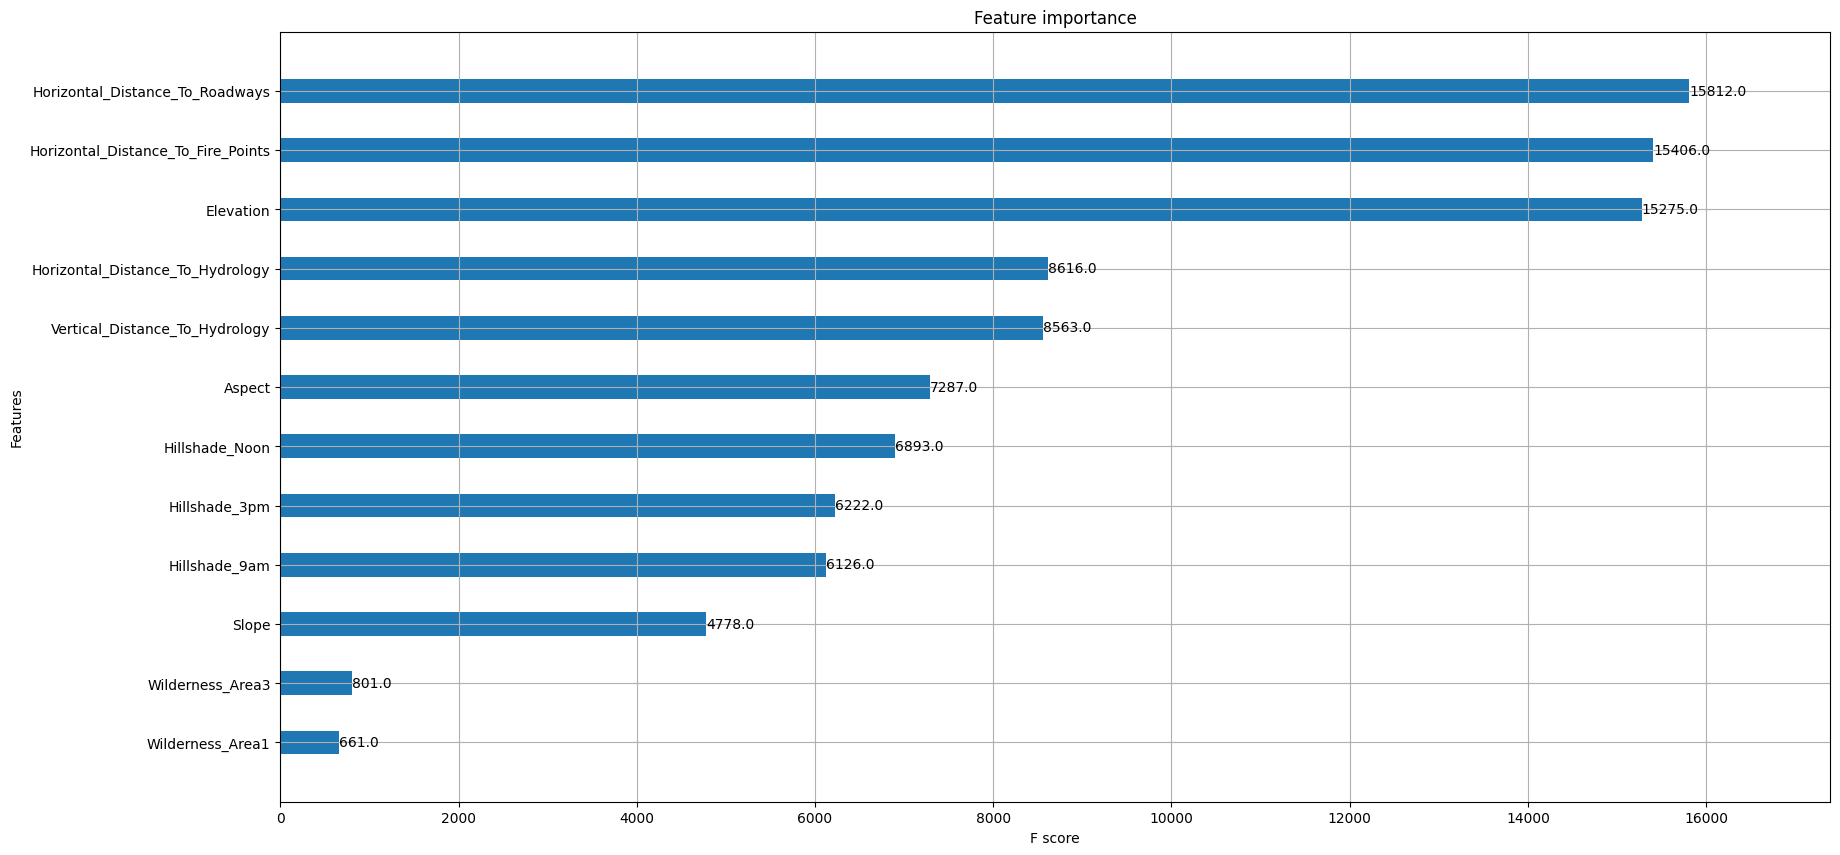

In [40]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
xgb.plot_importance(model_best, ax = ax, height=0.4,max_num_features =12)

In [60]:
Cover_Type = model_best.predict(df_test.drop(columns=["Id","Cover_Type"]))
predictions = pd.DataFrame({"Id":df_test.Id,"Cover_Type":Cover_Type})
predictions["Cover_Type"] = le.inverse_transform(predictions["Cover_Type"])
predictions

,Id,Cover_Type
0,1,5
1,2,5
2,3,2
3,4,2
4,5,5
...,...,...
581007,581008,3
581008,581009,3
581009,581010,3
581010,581011,3


In [62]:
predictions.to_csv("data/full_submission.csv",index=False)